In [1]:
import torch

import numpy as np
import trimesh

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Visualise point clouds sampled from mesh

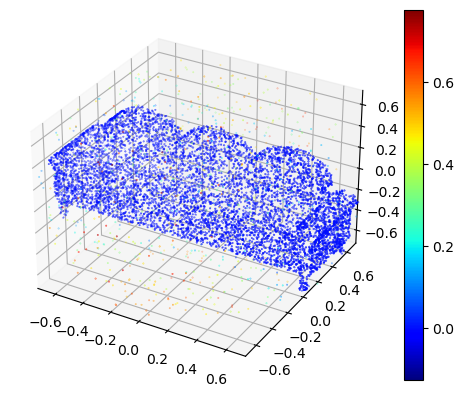

In [2]:
# load file
idx = 40
file_name = "./processed_data/train/" + str(idx) + ".npz"
npz = np.load(file_name)

# get position and sdf values
points = np.vstack((npz["pos"], npz["neg"]))
x = points[:,0]
y = points[:,1]
z = points[:,2]
sdf = points[:,-1]

# create a figure and a 3D axis
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# create a scatter plot and color the points based on the values
scatter = ax.scatter(z, -x, y, c=sdf, s = 0.1, cmap="jet")

# add a colorbar to show the color scale
fig.colorbar(scatter)

# set the axis labels
ax.set_xlim(-0.7, 0.7)
ax.set_ylim(-0.7, 0.7)
ax.set_zlim(-0.7, 0.7)

# show the plot
save_name = "img/point_clouds_" + str(idx) + ".png"
plt.savefig(save_name)
plt.show()

## Plot Loss Function

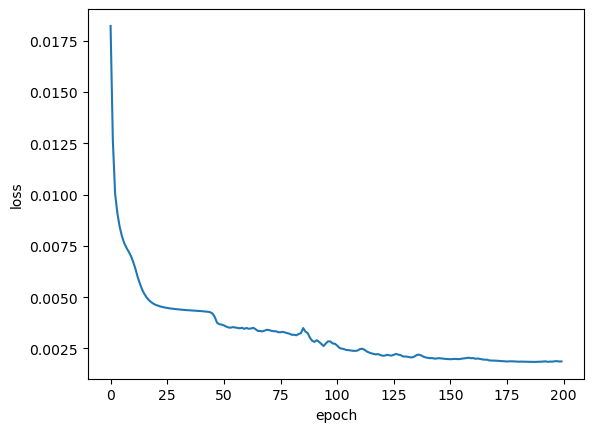

In [18]:
checkpoint = torch.load("./checkpoints/trained_model.pt", map_location=torch.device('cpu'))
loss = checkpoint["loss_log"]
loss = np.array(loss)

plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(loss)
plt.savefig("img/training_loss.png")
plt.show()